In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
 
from itertools import product
from tqdm import tqdm_notebook

import Model_Evaluation as me

In [2]:
books = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
#books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv')
# books = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Books_ext_fs.csv')
sales = books[['Year_Month','Sum of Sales']]
sales['Sum of Sales'] = sales['Sum of Sales']/100000
sales

,Year_Month,Sum of Sales
0,2008-01,2.826041
1,2008-02,2.624744
2,2008-03,3.260597
3,2008-04,2.153875
4,2008-05,4.995599
...,...,...
150,2020-07,1.503481
151,2020-08,1.560669
152,2020-09,4.687110
153,2020-10,11.184468


In [3]:
books = books.dropna(axis = 1)
exog = books.iloc[:,2:]
exog

,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking",...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,99.995901,16185.0,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
1,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,100.276486,11091.0,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,99.727612,14647.0,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
3,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,99.057287,14264.0,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
4,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,97.828232,12060.0,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,115.191063,19213.0,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
151,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,114.911925,18302.0,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
152,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,115.470202,28766.0,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000
153,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,115.098017,36912.0,...,2018.0,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000


In [5]:
# Standardizing the features based on unit variance
exog = StandardScaler().fit_transform(exog)
exog

array([[ 0.30107966, -0.40903828, -0.23480158, ..., -0.24847077,
        -1.2351139 , -1.98826439],
       [ 0.21448922, -0.47320628, -0.2941929 , ...,  0.98880211,
        -0.59357489, -0.81291369],
       [ 0.14623792, -0.51831502, -0.31291176, ...,  1.53521565,
        -1.04040931, -1.25292378],
       ...,
       [ 1.1588675 ,  0.08769061,  1.70000768, ..., -1.28986807,
         0.49804297,  0.37862444],
       [ 1.29133629,  0.90631567,  1.94477252, ..., -0.69026939,
         0.88139016,  0.53157758],
       [ 1.36059139,  1.13107458,  2.03366644, ..., -1.79222855,
         1.32801313,  0.35538404]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(exog, sales, test_size=0.2, random_state=60616, shuffle=False)

In [7]:
X_train

array([[ 0.30107966, -0.40903828, -0.23480158, ..., -0.24847077,
        -1.2351139 , -1.98826439],
       [ 0.21448922, -0.47320628, -0.2941929 , ...,  0.98880211,
        -0.59357489, -0.81291369],
       [ 0.14623792, -0.51831502, -0.31291176, ...,  1.53521565,
        -1.04040931, -1.25292378],
       ...,
       [ 1.55505935,  2.11060493,  1.50310715, ...,  0.01898441,
         0.63098841, -0.20426663],
       [ 1.42932591,  2.12640929,  1.2080596 , ...,  1.05242223,
         1.60286642,  1.54426269],
       [ 1.50888145,  1.84158852,  1.29193507, ...,  0.63731718,
         1.45159109,  1.08900044]])

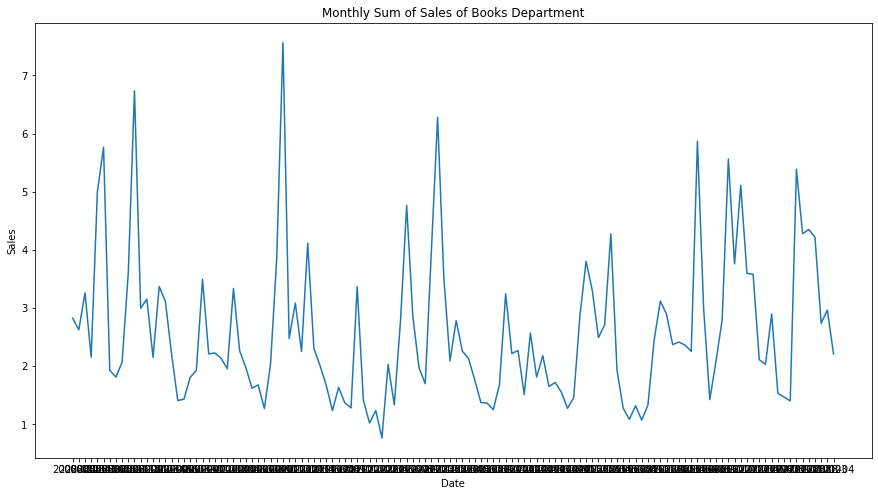

In [12]:
plt.figure(figsize=[15,8])
plt.plot(y_train['Year_Month'],y_train['Sum of Sales'])
plt.title('Monthly Sum of Sales of Books Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [8]:
ad_fuller_result = adfuller(y_train['Sum of Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.2230092199708915
p-value: 2.0875628540467943e-10


In [9]:
ad_fuller_result = adfuller(y_test['Sum of Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.351965925155114
p-value: 0.0003606484772182935


Since the p-value is greater than 0.5, we cannot reject null hypothesis and must assume that the series is not stationary.

sales['sales_diffed'] = sales['Sum of Sales'].diff(1)
sales

ad_fuller_result = adfuller(sales['sales_diffed'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

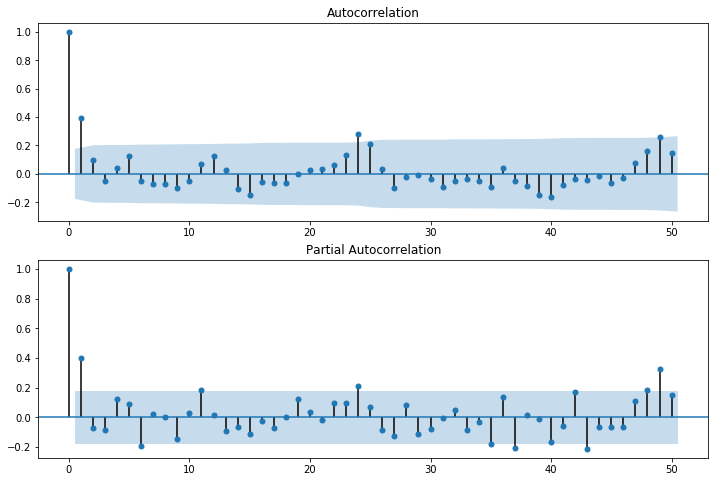

In [16]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(y_train['Sum of Sales'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_train['Sum of Sales'], lags=50, ax=ax[1])
plt.show()

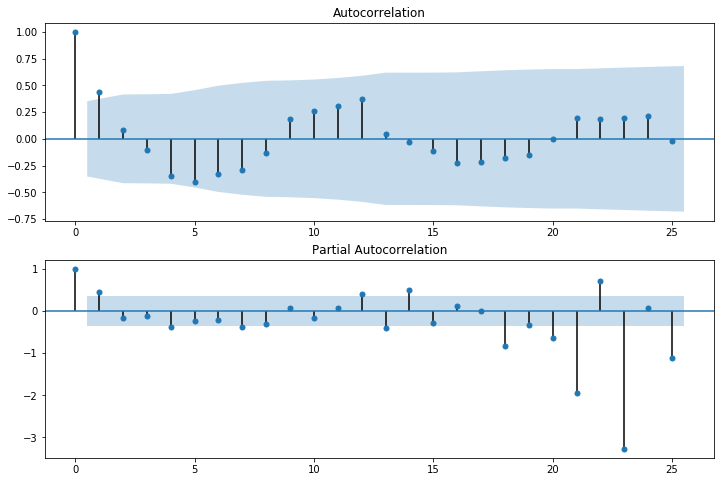

In [11]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(y_test['Sum of Sales'], lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_test['Sum of Sales'], lags=25, ax=ax[1])
plt.show()

# New Section

In [12]:
p = range(0,4)
d = range(0,1)
q = range(0,4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

df = pd.DataFrame()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train['Sum of Sales'],
                                            exog = X_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))

            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
            print(" ")
        except:
            continue
df.columns = ['param','param_seasonal', 'AIC']

ARIMA(0, 0, 0)x(0, 0, 0, 12)- AIC:435.631830161758
 
ARIMA(0, 0, 0)x(0, 0, 1, 12)- AIC:344.7720073418544
 
ARIMA(0, 0, 0)x(0, 0, 2, 12)- AIC:312.88885331671895
 
ARIMA(0, 0, 0)x(0, 0, 3, 12)- AIC:3520.150483400543
 
ARIMA(0, 0, 0)x(1, 0, 0, 12)- AIC:363.21166259767466
 
ARIMA(0, 0, 0)x(1, 0, 1, 12)- AIC:344.2260779758842
 
ARIMA(0, 0, 0)x(1, 0, 2, 12)- AIC:315.0681061563107
 
ARIMA(0, 0, 0)x(1, 0, 3, 12)- AIC:3117.783394624419
 
ARIMA(0, 0, 0)x(2, 0, 0, 12)- AIC:329.68970552982626
 
ARIMA(0, 0, 0)x(2, 0, 1, 12)- AIC:322.19647482527944
 
ARIMA(0, 0, 0)x(2, 0, 2, 12)- AIC:310.6917931145529
 
ARIMA(0, 0, 0)x(2, 0, 3, 12)- AIC:4092.677625000117
 
ARIMA(0, 0, 0)x(3, 0, 0, 12)- AIC:258.68751725700815
 
ARIMA(0, 0, 0)x(3, 0, 1, 12)- AIC:261.46743260997175
 
ARIMA(0, 0, 0)x(3, 0, 2, 12)- AIC:263.91790298063233
 
ARIMA(0, 0, 0)x(3, 0, 3, 12)- AIC:3509.0825951167967
 
ARIMA(0, 0, 1)x(0, 0, 0, 12)- AIC:391.01600833621876
 
ARIMA(0, 0, 1)x(0, 0, 1, 12)- AIC:329.0883514170324
 
ARIMA(0, 0, 1)x(0, 0

ARIMA(2, 0, 1)x(1, 0, 3, 12)- AIC:3370.0507333627615
 
ARIMA(2, 0, 1)x(2, 0, 0, 12)- AIC:331.17747573079504
 
ARIMA(2, 0, 1)x(2, 0, 1, 12)- AIC:335.629189803989
 
ARIMA(2, 0, 1)x(2, 0, 2, 12)- AIC:333.95200958246323
 
ARIMA(2, 0, 1)x(2, 0, 3, 12)- AIC:3443.892472143681
 
ARIMA(2, 0, 1)x(3, 0, 0, 12)- AIC:290.41123874066386
 
ARIMA(2, 0, 1)x(3, 0, 1, 12)- AIC:288.4517079297814
 
ARIMA(2, 0, 1)x(3, 0, 2, 12)- AIC:294.22637981318917
 
ARIMA(2, 0, 1)x(3, 0, 3, 12)- AIC:3321.290480888306
 
ARIMA(2, 0, 2)x(0, 0, 0, 12)- AIC:386.5253982731224
 
ARIMA(2, 0, 2)x(0, 0, 1, 12)- AIC:347.77551120919736
 
ARIMA(2, 0, 2)x(0, 0, 2, 12)- AIC:327.5515402261902
 
ARIMA(2, 0, 2)x(0, 0, 3, 12)- AIC:4297.959519998972
 
ARIMA(2, 0, 2)x(1, 0, 0, 12)- AIC:349.98796567591717
 
ARIMA(2, 0, 2)x(1, 0, 1, 12)- AIC:350.8173200728616
 
ARIMA(2, 0, 2)x(1, 0, 2, 12)- AIC:327.83400545473415
 
ARIMA(2, 0, 2)x(1, 0, 3, 12)- AIC:4015.6638031053913
 
ARIMA(2, 0, 2)x(2, 0, 0, 12)- AIC:327.8668264337481
 
ARIMA(2, 0, 2)x(2, 0

In [13]:
df = df.sort_values('AIC').reset_index(drop= True)
df

,param,param_seasonal,AIC
0,"(3, 0, 1)","(3, 0, 1, 12)",210.995653
1,"(3, 0, 1)","(3, 0, 2, 12)",218.086977
2,"(3, 0, 1)","(3, 0, 0, 12)",225.646214
3,"(3, 0, 0)","(3, 0, 1, 12)",237.424596
4,"(2, 0, 0)","(3, 0, 0, 12)",238.683775
...,...,...,...
251,"(0, 0, 2)","(2, 0, 3, 12)",4146.978068
252,"(2, 0, 2)","(0, 0, 3, 12)",4297.959520
253,"(0, 0, 2)","(0, 0, 3, 12)",4356.337409
254,"(1, 0, 1)","(1, 0, 3, 12)",6202.483427


The above output suggests that SARIMAX(3,0,0)(3,0,0,12) yields the lowest AIC value of 328.424883. Therefore we should consider this to be the optimal option.

In [14]:
mod = sm.tsa.statespace.SARIMAX(y_train['Sum of Sales'],
                                exog = X_train,
                                order=(3, 0, 1),
                                seasonal_order=(3, 0, 1, 12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Sum of Sales   No. Observations:                  124
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 12)   Log Likelihood                -111.570
Date:                            Sat, 27 Mar 2021   AIC                            381.140
Time:                                    01:35:37   BIC                            603.943
Sample:                                         0   HQIC                           471.648
                                            - 124                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3795      4.803     -0.079      0.937      -9.793       9.034
x2             4.0017      1.591   

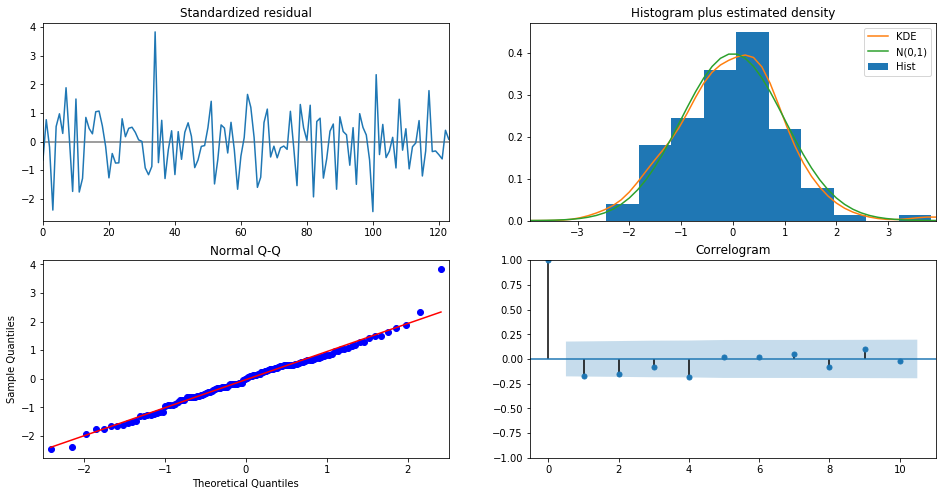

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Here we will forecast the values using the model. Can change starting point from which we need to forecast. For now we will keep starting point after 50 observations

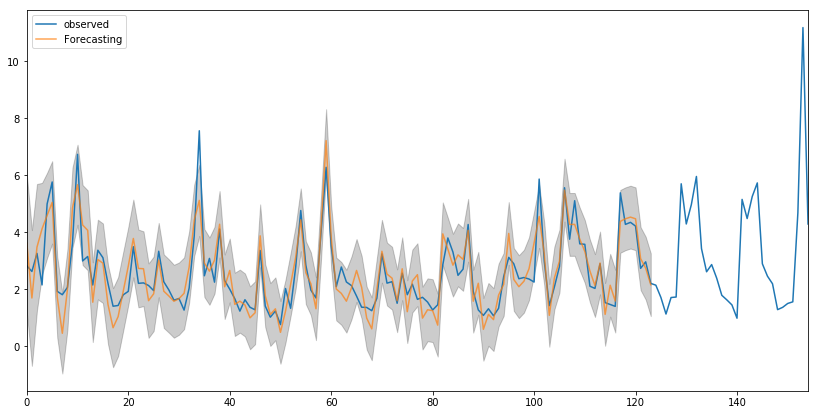

In [19]:
#Point from which prediction starts
start_point = 0
pred = results.get_prediction(start=start_point)
pred_ci = pred.conf_int()
ax = sales['Sum of Sales'].plot(label='observed',)
pred.predicted_mean.plot(ax=ax, label='Forecasting', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

In [17]:
results.forecast(steps=31,exog=X_test)

124    -3.677847
125    -0.415013
126    -2.860554
127    -4.941995
128    -7.251814
129   -12.574279
130   -15.473311
131   -13.358354
132   -13.312179
133   -13.629217
134   -15.919850
135   -14.032685
136   -15.018658
137   -13.207360
138   -16.338972
139   -15.709204
140   -15.999731
141   -14.660668
142   -13.355359
143   -14.552810
144   -12.632737
145   -12.654725
146   -20.868118
147   -78.550429
148    -8.371353
149    10.138640
150    10.284373
151    10.601660
152     6.584535
153     4.894003
154     5.591635
dtype: float64

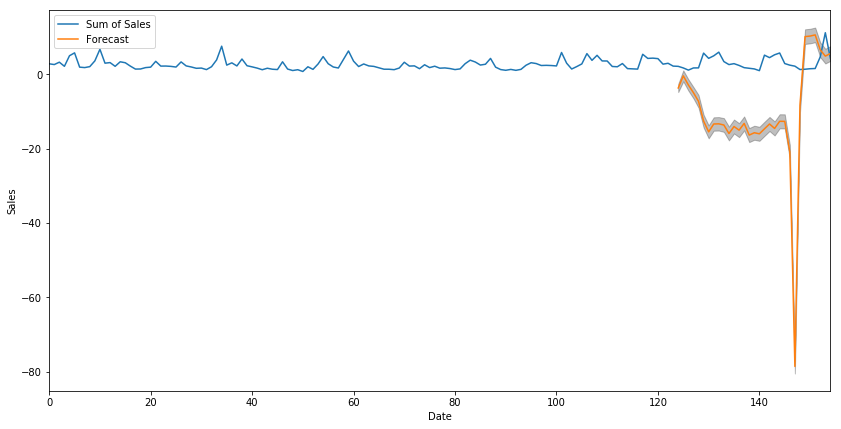

In [18]:
pred_uc = results.get_forecast(steps=31,exog=X_test)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

# Model Evaluation
 - Mean Absolute Percentage Error
 - Mean Absolute Error
 - BIAS
 - Mean Squared Error
 - Root Mean Squared Error

In [20]:
predictions = pred.predicted_mean
actual = y_train['Sum of Sales'][start_point:]

In [21]:
me.evaluate_model(predictions,actual)

			Model Performance

Mean Absolute Percentage Error: 0.2091088460950474

Mean Absolute Error: 0.47504956071902954

BIAS: -0.017753714136033816

Mean Squared Error: 0.039084101337376866

Root Mean Squared Error: 0.19769699374896135


In [22]:
test_prediction = results.forecast(steps=31,exog=X_test)
test_prediction

124    -3.677847
125    -0.415013
126    -2.860554
127    -4.941995
128    -7.251814
129   -12.574279
130   -15.473311
131   -13.358354
132   -13.312179
133   -13.629217
134   -15.919850
135   -14.032685
136   -15.018658
137   -13.207360
138   -16.338972
139   -15.709204
140   -15.999731
141   -14.660668
142   -13.355359
143   -14.552810
144   -12.632737
145   -12.654725
146   -20.868118
147   -78.550429
148    -8.371353
149    10.138640
150    10.284373
151    10.601660
152     6.584535
153     4.894003
154     5.591635
dtype: float64

In [23]:
test_actual = y_test['Sum of Sales']
test_actual

124     2.144722
125     1.712854
126     1.132139
127     1.711591
128     1.729007
129     5.702706
130     4.292626
131     4.973172
132     5.959677
133     3.427304
134     2.615216
135     2.867361
136     2.388626
137     1.790320
138     1.627745
139     1.452330
140     0.985878
141     5.154776
142     4.483683
143     5.255255
144     5.733124
145     2.894873
146     2.462465
147     2.193816
148     1.286718
149     1.367123
150     1.503481
151     1.560669
152     4.687110
153    11.184468
154     4.291668
Name: Sum of Sales, dtype: float64

In [24]:
me.evaluate_model(test_prediction,test_actual)

			Model Performance

Mean Absolute Percentage Error: 6.395902112120059

Mean Absolute Error: 15.529885969165322

BIAS: 13.60789922247745

Mean Squared Error: 5740.422558722174

Root Mean Squared Error: 75.7655763438923
